# Colab Setup

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3951653522500163552, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1441874836748983898
 physical_device_desc: "device: XLA_CPU device"]

In [428]:
!cat /proc/meminfo

MemTotal:       13335212 kB
MemFree:         1343776 kB
MemAvailable:   11375124 kB
Buffers:          116504 kB
Cached:          5096760 kB
SwapCached:            0 kB
Active:          1975944 kB
Inactive:        9679188 kB
Active(anon):    1506400 kB
Inactive(anon):      316 kB
Active(file):     469544 kB
Inactive(file):  9678872 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               256 kB
Writeback:             0 kB
AnonPages:       6441992 kB
Mapped:           255620 kB
Shmem:               800 kB
Slab:             237312 kB
SReclaimable:     209060 kB
SUnreclaim:        28252 kB
KernelStack:        3472 kB
PageTables:        17396 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667604 kB
Committed_AS:    8135508 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

## Authenticate With Colab
### Generate authentication tokens for colab
this will get access to your google drive but does not mount it to colab 

In [0]:
from google.colab import auth

auth.authenticate_user()

## Mount Google Drive in Colab VM

In [5]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null

!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...


In [0]:
from oauth2client.client import GoogleCredentials

creds = GoogleCredentials.get_application_default()

In [7]:
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

### moving files from GD to colab

In [0]:
!cp -a drive/ColabNotebooks/AV/american_express_amexpert_2018/ .

In [11]:
!ls

adc.json  american_express_amexpert_2018  drive  sample_data


In [12]:
cd american_express_amexpert_2018/input/

/content/american_express_amexpert_2018/input


In [13]:
!ls

sample_submission.csv  test.csv  train_amex.zip


In [14]:
!ls -lh *

-rw-r--r-- 1 root root 1.1M Nov 15 20:51 sample_submission.csv
-rw-r--r-- 1 root root 9.1M Nov 15 20:55 test.csv
-rw-r--r-- 1 root root  83M Nov 15 20:55 train_amex.zip


In [0]:
#!rm train_amex.zip
#!rm sample_submission.csv

In [0]:
#!cp ../../drive/ColabNotebooks/AV/american_express_amexpert_2018/input/train_amex.zip .
#!cp ../../drive/ColabNotebooks/AV/american_express_amexpert_2018/input/sample_submission.csv .

In [0]:
#!ls

In [0]:
#!ls -lh *

In [20]:
!unzip train_amex.zip

Archive:  train_amex.zip
  inflating: historical_user_logs.csv  
  inflating: train.csv               


In [21]:
!ls

historical_user_logs.csv  test.csv	  train.csv
sample_submission.csv	  train_amex.zip


In [22]:
!ls -lh *

-rw-r--r-- 1 root root 721M Nov 15 17:59 historical_user_logs.csv
-rw-r--r-- 1 root root 1.1M Nov 15 20:51 sample_submission.csv
-rw-r--r-- 1 root root 9.1M Nov 15 20:55 test.csv
-rw-r--r-- 1 root root  83M Nov 15 20:55 train_amex.zip
-rw-r--r-- 1 root root  33M Nov 15 17:58 train.csv


In [0]:
!rm train_amex.zip

In [13]:
cd ../code

/content/american_express_amexpert_2018/code


### Python and packages info

In [25]:
!python --version

Python 3.6.6


In [26]:
!pip --version

pip 18.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)


In [27]:
!pip freeze

absl-py==0.6.1
altair==2.2.2
astor==0.7.1
atomicwrites==1.2.1
attrs==18.2.0
beautifulsoup4==4.6.3
bleach==3.0.2
cachetools==3.0.0
certifi==2018.10.15
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==2.0.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
future==0.16.0
gast==0.2.0
google-api-core==1.5.2
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.5
grpcio==1.15.0
h5py==2.8.0
httplib2==0.11.3
idna==2.6
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.13.0
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
Keras==2.2.4
Keras-Applications==1.0.6
Keras-Preprocessing==1.0.5
Markdown==3.0.1
MarkupSafe==1.1.0
matplotlib==2.1.2
mistune==0.

In [28]:
!pip uninstall statsmodels

Uninstalling statsmodels-0.8.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/statsmodels-0.8.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.8.0


In [29]:
!pip install statsmodels==0.9.0rc1

    100% |████████████████████████████████| 12.6MB 2.4MB/s 
  Running setup.py bdist_wheel for statsmodels ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/c2/48/9e/d5ae62463cbe52b1a97a1c3a0f1ca5b7135514c577cb3838bb
Successfully built statsmodels


In [96]:
#!pip install Cython

    100% |████████████████████████████████| 2.1MB 9.0MB/s 


In [87]:
#!git clone git://github.com/statsmodels/statsmodels.git

Cloning into 'statsmodels'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 74779 (delta 22), reused 30 (delta 17), pack-reused 74736
Receiving objects: 100% (74779/74779), 29.85 MiB | 22.01 MiB/s, done.
Resolving deltas: 100% (54652/54652), done.


In [89]:
#cd statsmodels/

/content/american_express_amexpert_2018/code/statsmodels


In [98]:
#!python setup.py install

Compiling statsmodels/tsa/_exponential_smoothers.pyx because it changed.
Compiling statsmodels/tsa/regime_switching/_hamilton_filter.pyx because it changed.
Compiling statsmodels/tsa/regime_switching/_kim_smoother.pyx because it changed.
Compiling statsmodels/nonparametric/linbin.pyx because it changed.
Compiling statsmodels/nonparametric/_smoothers_lowess.pyx because it changed.
Compiling statsmodels/tsa/kalmanf/kalman_loglike.pyx because it changed.
Compiling statsmodels/tsa/statespace/_initialization.pyx because it changed.
Compiling statsmodels/tsa/statespace/_representation.pyx because it changed.
Compiling statsmodels/tsa/statespace/_kalman_filter.pyx because it changed.
Compiling statsmodels/tsa/statespace/_filters/_conventional.pyx because it changed.
Compiling statsmodels/tsa/statespace/_filters/_inversions.pyx because it changed.
Compiling statsmodels/tsa/statespace/_filters/_univariate.pyx because it changed.
Compiling statsmodels/tsa/statespace/_filters/_univariate_diffuse.

In [30]:
!pip install catboost

    100% |████████████████████████████████| 55.3MB 642kB/s 


In [31]:
!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 6.1MB/s 


In [3]:
!pip freeze

absl-py==0.6.1
altair==2.2.2
astor==0.7.1
atomicwrites==1.2.1
attrs==18.2.0
beautifulsoup4==4.6.3
bleach==3.0.2
cachetools==3.0.0
catboost==0.11.1
certifi==2018.10.15
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==2.0.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
enum34==1.1.6
future==0.16.0
gast==0.2.0
google-api-core==1.5.2
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.5
grpcio==1.15.0
h5py==2.8.0
httplib2==0.11.3
idna==2.6
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.13.0
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
Keras==2.2.4
Keras-Applications==1.0.6
Keras-Preprocessing==1.0.5
lightgbm==2.2.2
Markdown==3.0.1


In [35]:
!pip install pytest

    100% |████████████████████████████████| 225kB 7.2MB/s 


### Now Restart runtime

In [102]:
#cd ..

/content/american_express_amexpert_2018/code


In [103]:
#!ls

analysis.ipynb	statsmodels


In [0]:
#!rm -r statsmodels

In [105]:
#!ls

analysis.ipynb


# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

## Problem Statement
Recent years have witnessed a surge in the number of internet savvy users. Companies in the financial services domain leverage this huge internet traffic arriving at their interface by strategically placing ads/promotions for cross selling of various financial products on a plethora of web pages. The digital analytics unit of Best Cards Company uses cutting edge data science and machine learning for successful promotion of its valuable card products. They believe that a predictive model that forecasts whether a session involves a click on the ad/promotion would help them extract the maximum out of the huge clickstream data that they have collected. You are hired as a consultant to build an efficient model to predict whether a user will click on an ad or not, given the following features:

- Clickstream data/train data for duration: (2nd July 2017 – 7th July 2017)
- Test data for duration: (8th July 2017 – 9th July 2017)
- User features (demographics, user behaviour/activity, buying power etc.)
- Historical transactional data of the previous month with timestamp info (28th May 2017– 1st July 2017) (User views/interest registered)
- Ad features (product category, webpage, campaign for ad etc.)
- Date time features (exact timestamp of the user session)

## Data
#### Train Data
|Variable	| Definition | 
| ------------- | :---------------|
| session_id | 	Unique ID for a session |
| DateTime	| Timestamp |
| user_id |	Unique ID for user |
| product |	Product ID |
| campaign_id |	Unique ID for ad campaign |
| webpage_id |	Webpage ID at which the ad is displayed |
| product_category_1 |	Product category 1 (Ordered) |
| product_category_2 |	Product category 2 |
| user_group_id |	Customer segmentation ID |
| gender |	Gender of the user |
| age_level  |	Age level of the user |
| user_depth |	Interaction level of user with the web platform (1 - low, 2 - medium, 3 - High) |
| city_development_index |	Scaled development index of the residence city |
| var_1 |	Anonymised session feature |
| is_click |	0 - no click, 1 - click |

#### Historical User logs
| Variable	Definition |
| ------------ | ---------------- |
| DateTime	| Timestamp |
| user_id |	Unique ID for the user |
| product |	Product ID |
| action |	view/interest (view - viewed the product page, interest - registered interest for the product) |


## Evaluation metric
- **ROC AUC score**

## Public and Private Split
- Test data is further randomly divided into Public (30%) and Private (70%) data.
- Your initial responses will be checked and scored on the Public data.
- The final rankings would be based on your private score which will be published once the competition is over.

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

In [0]:
import math
from sklearn.metrics import mean_squared_error

In [0]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing

In [14]:
print('# File sizes')
for f in os.listdir('../input'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')

# File sizes
train.csv                     34.33MB
test.csv                      9.47MB
sample_submission.csv         1.14MB
historical_user_logs.csv      754.99MB


In [0]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [0]:
past_df = pd.read_csv('../input/historical_user_logs.csv')

In [0]:
train_df.head(10)

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0
5,151475,2017-07-02 00:01,509591,I,359520,13787,2,NaN,1.0,Male,1.0,3.0,NaN,0,0
6,17583,2017-07-02 00:01,1091463,F,405490,60305,3,NaN,9.0,Female,3.0,3.0,4.0,0,0
7,461128,2017-07-02 00:01,469098,C,360936,13787,3,NaN,4.0,Male,4.0,3.0,4.0,0,0
8,390699,2017-07-02 00:02,611906,H,105960,11085,5,270915.0,NaN,NaN,NaN,NaN,NaN,0,0
9,353607,2017-07-02 00:02,418107,B,360936,13787,2,NaN,4.0,Male,4.0,3.0,4.0,0,0


In [0]:
# shape of datasets
print("shape of train dataset : ", train_df.shape)
print("shape of test dataset : ", test_df.shape)

shape of train dataset :  (463291, 15)
shape of test dataset :  (128858, 14)


Clickstream data/train data for duration: (2nd July 2017 – 7th July 2017)

Test data for duration: (8th July 2017 – 9th July 2017)

In [0]:
# check missing values in train dataset
print("Train data missing values \n")
train_df.isnull().sum()

Train data missing values 



session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [0]:
# check missing values in test dataset
print("Test data missing values \n")
test_df.isnull().sum()

Test data missing values 



session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
dtype: int64

In [0]:
train_df[(train_df['user_group_id'].isnull()) & (train_df['gender'].isnull()) & (train_df['age_level'].isnull()) & (train_df['user_depth'].isnull()) & (train_df['city_development_index'].isnull())].shape[0]

18243

In [0]:
test_df[(test_df['user_group_id'].isnull()) & (test_df['gender'].isnull()) & (test_df['age_level'].isnull()) & (test_df['user_depth'].isnull()) & (test_df['city_development_index'].isnull())].shape[0]

5684

- For some reason all of the user related features are missing for 18243 records in train data and 5684 records in test data.
- maybe because of privacy settings or these users have not shared this information.
- If users have not shared this information then maybe *user_group_id* is some how derived from  other user features.


### session_id

In [0]:
train_df['session_id'].nunique()

463291

In [0]:
test_df['session_id'].nunique()

128858

In [0]:
len(set(test_df['session_id'].unique()) - set(train_df['session_id'].unique()))

128858

session id is unique in both dataset. they do not repeat.

### user_id

In [0]:
print("There are {} unique user ids in train dataset".format(train_df['user_id'].nunique()))
print("There are {} unique user ids in test dataset".format(test_df['user_id'].nunique()))

There are 150347 unique user ids in train dataset
There are 66502 unique user ids in test dataset


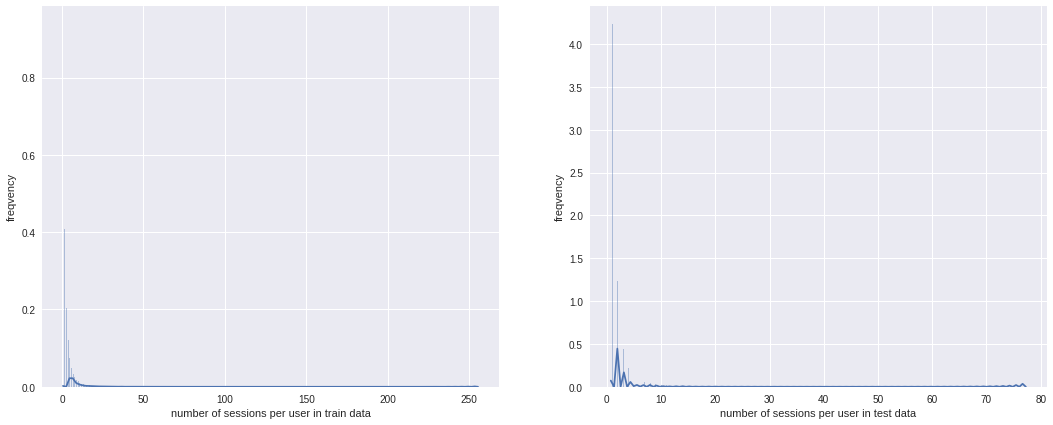

In [0]:
fig, ax = plt.subplots(figsize=(18, 7), ncols=2)
sns.distplot(train_df.groupby(['user_id'])['var_1'].count(), ax=ax[0], bins=500)
sns.distplot(test_df.groupby(['user_id'])['var_1'].count(), ax=ax[1], bins=500)
ax[0].set(xlabel='number of sessions per user in train data', ylabel='freqvency')
ax[1].set(xlabel='number of sessions per user in test data', ylabel='freqvency')
plt.show()

some users has lots of session records whch majority of users has 1 - 2 sessions

In [0]:
print("number of user ids which are not present in train dataset : ", len(set(test_df['user_id'].unique()) - set(train_df['user_id'].unique())))

number of user ids which are not present in train dataset :  27382


In [0]:
print(test_df['user_id'].isin(list(set(test_df['user_id'].unique()) - set(train_df['user_id'].unique()))).sum(), " records in test data which has new user ids")

37483  records in test data which has new user ids


### is_click

In [0]:
print(train_df['is_click'].value_counts())
print(train_df['is_click'].value_counts(normalize=True))
print("CTR is : ", train_df['is_click'].mean() * 100, " % for last 6 days")

0    431960
1     31331
Name: is_click, dtype: int64
0    0.932373
1    0.067627
Name: is_click, dtype: float64
CTR is :  6.762704218299081  % for last 6 days


### campaign_id

In [0]:
print("{} unique campaign ids in train dataset".format(train_df['campaign_id'].nunique()))
print("{} unique campaign ids in test dataset".format(test_df['campaign_id'].nunique()))

10 unique campaign ids in train dataset
10 unique campaign ids in test dataset


In [0]:
print("number of campaign ids which are not present in train dataset : ", len(set(test_df['campaign_id'].unique()) - set(train_df['campaign_id'].unique())))

number of campaign ids which are not present in train dataset :  0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


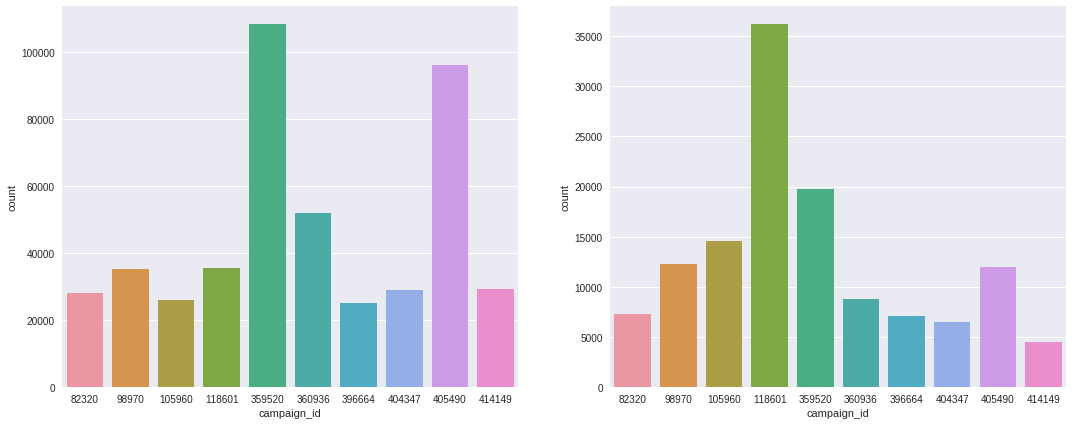

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['campaign_id'], ax=ax[0])
sns.countplot(test_df['campaign_id'], ax=ax[1])
plt.show()

### webpage_id

In [0]:
print("{} unique webpage_id ids in train dataset".format(train_df['webpage_id'].nunique()))
print("{} unique webpage_id ids in test dataset".format(test_df['webpage_id'].nunique()))
print("number of webpage_id ids which are not present in train dataset : ", len(set(test_df['webpage_id'].unique()) - set(train_df['webpage_id'].unique())))

9 unique webpage_id ids in train dataset
9 unique webpage_id ids in test dataset
number of webpage_id ids which are not present in train dataset :  0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


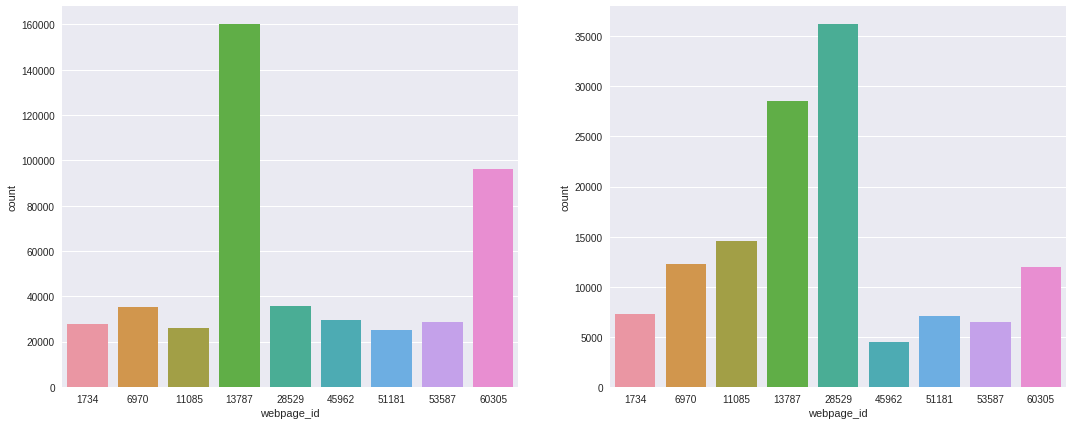

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['webpage_id'], ax=ax[0])
sns.countplot(test_df['webpage_id'], ax=ax[1])
plt.show()

### product

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


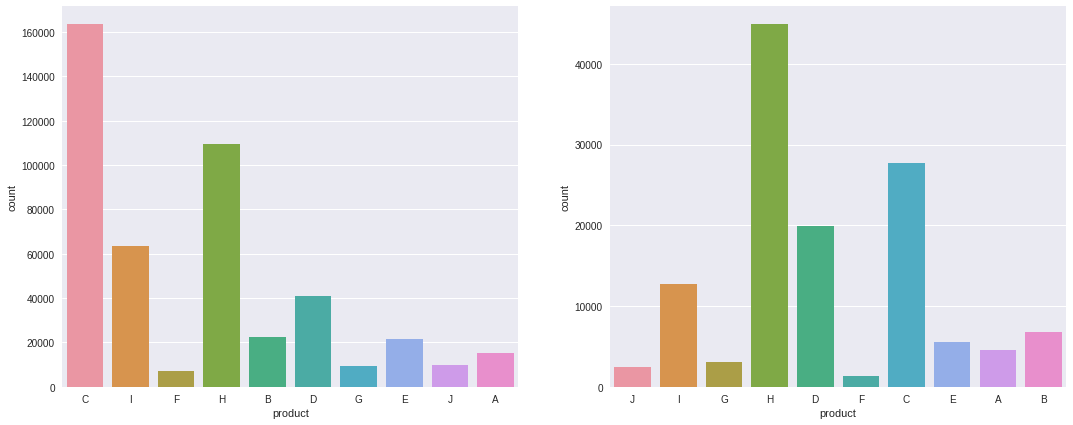

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['product'], ax=ax[0])
sns.countplot(test_df['product'], ax=ax[1])
plt.show()

### product_category_1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


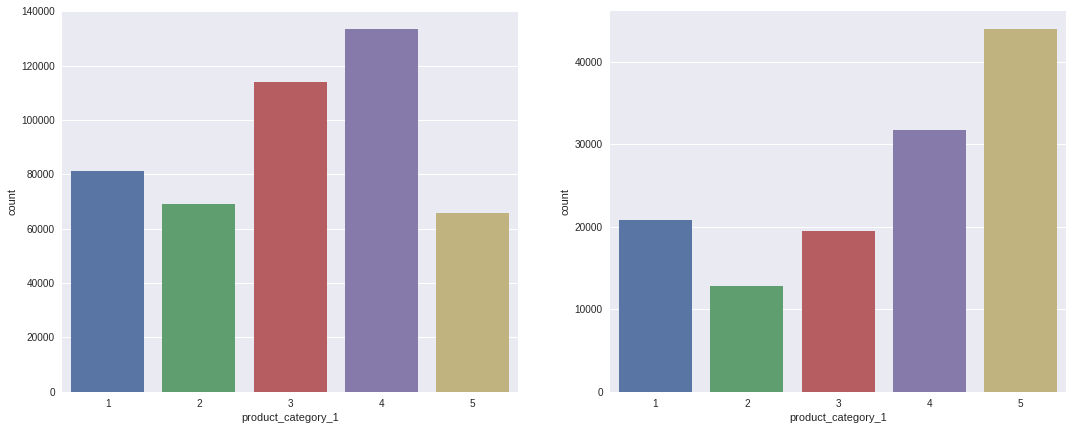

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['product_category_1'], ax=ax[0])
sns.countplot(test_df['product_category_1'], ax=ax[1])
plt.show()

### product_category_2

In [0]:
print("{} unique product_category_2 in train dataset".format(train_df['product_category_2'].nunique()))
print("{} unique product_category_2 in test dataset".format(test_df['product_category_2'].nunique()))
print("number of product_category_2 which are not present in train dataset : ", len(set(test_df['product_category_2'].unique()) - set(train_df['product_category_2'].unique())))

29 unique product_category_2 in train dataset
19 unique product_category_2 in test dataset
number of product_category_2 which are not present in train dataset :  3


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


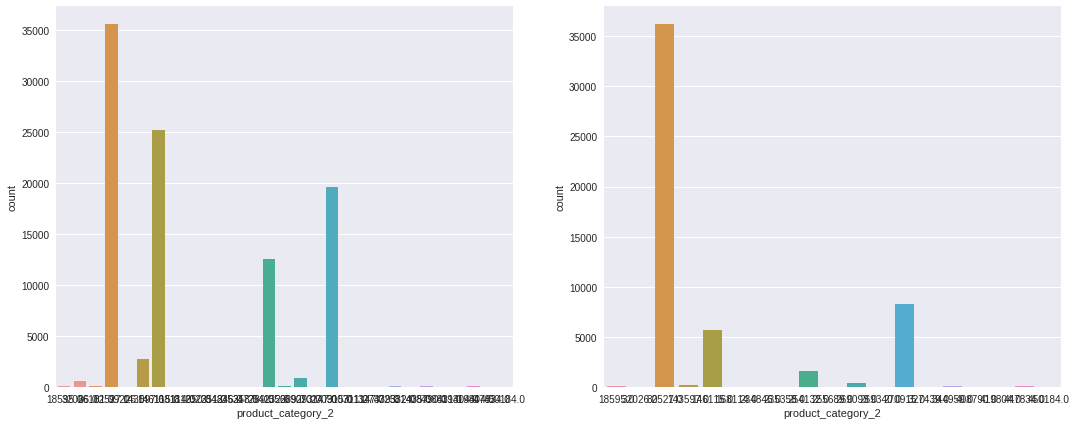

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['product_category_2'], ax=ax[0])
sns.countplot(test_df['product_category_2'], ax=ax[1])
plt.show()

### user_group_id

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


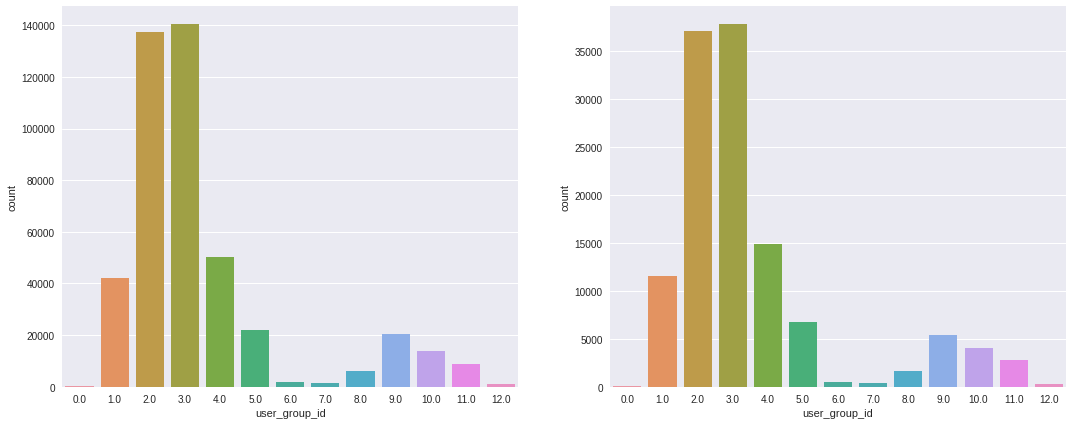

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['user_group_id'], ax=ax[0])
sns.countplot(test_df['user_group_id'], ax=ax[1])
plt.show()

### gender

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


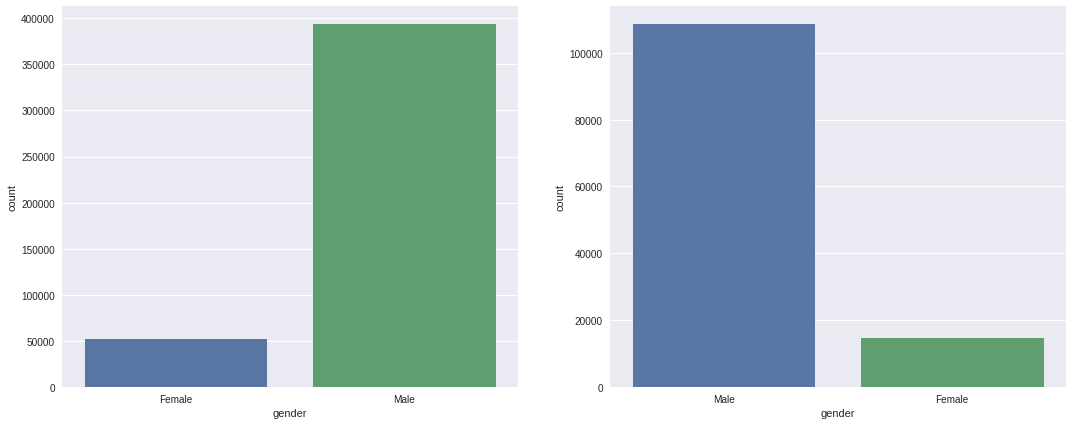

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['gender'], ax=ax[0])
sns.countplot(test_df['gender'], ax=ax[1])
plt.show()

### age_level

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


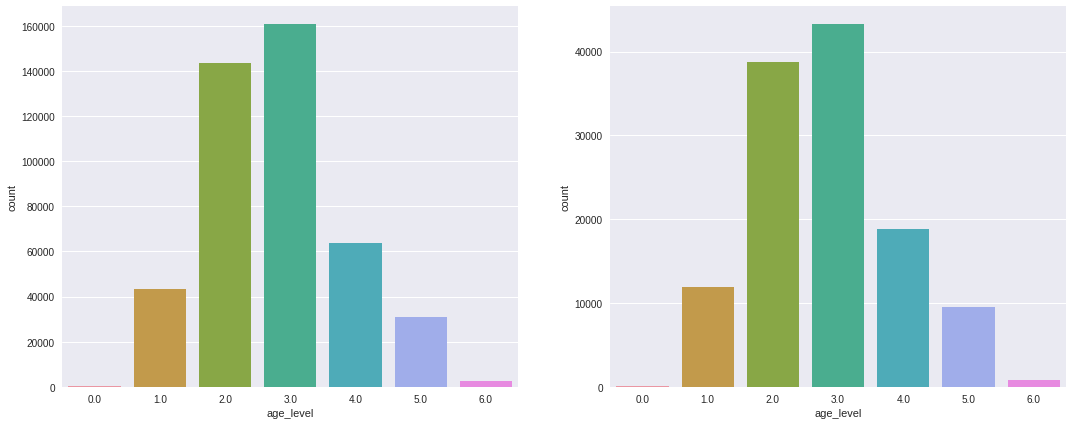

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['age_level'], ax=ax[0])
sns.countplot(test_df['age_level'], ax=ax[1])
plt.show()

### user_depth

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


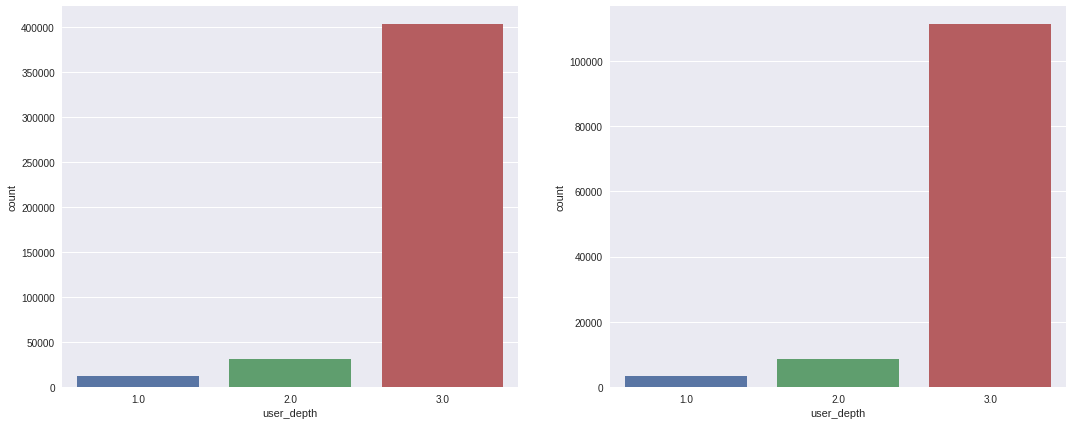

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['user_depth'], ax=ax[0])
sns.countplot(test_df['user_depth'], ax=ax[1])
plt.show()

### city_development_index

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


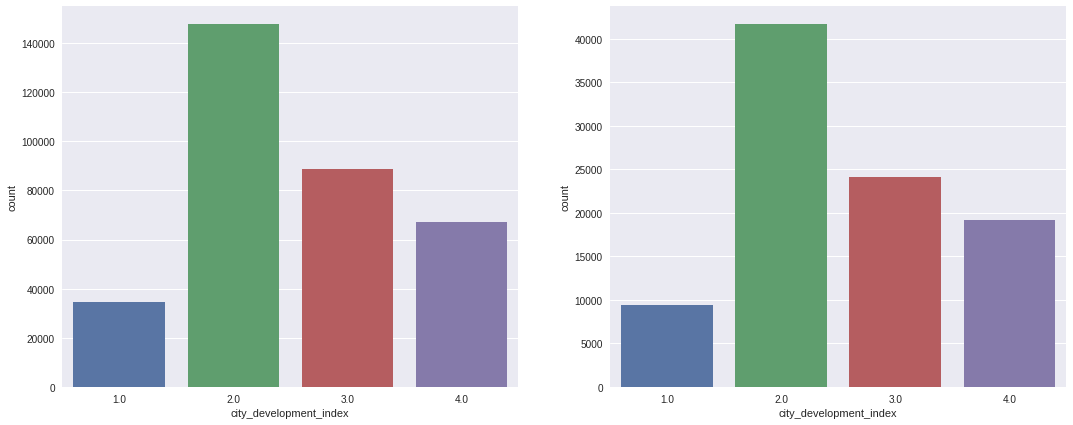

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['city_development_index'], ax=ax[0])
sns.countplot(test_df['city_development_index'], ax=ax[1])
plt.show()

### var_1

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


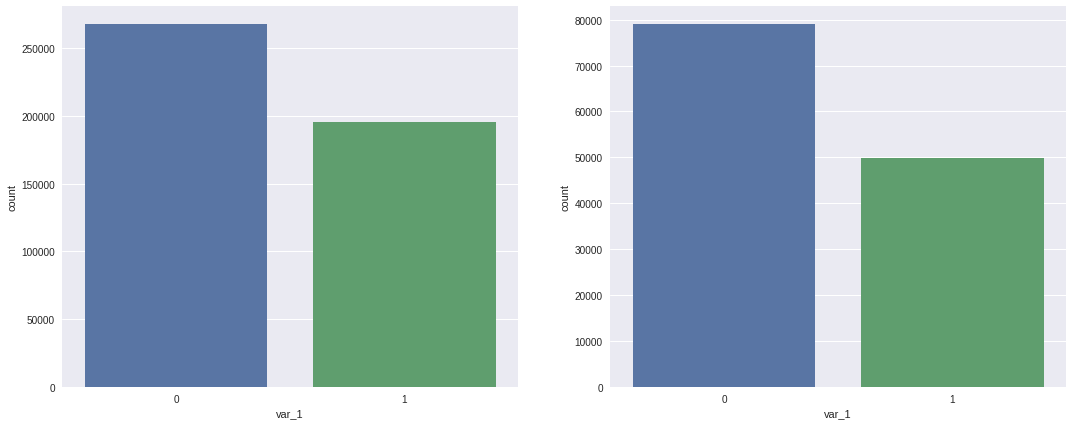

In [0]:
fig, ax = plt.subplots(figsize=(18,7), ncols=2)
sns.countplot(train_df['var_1'], ax=ax[0])
sns.countplot(test_df['var_1'], ax=ax[1])
plt.show()

### All categorical variables with target variable `is_click`

In [0]:
cat_cols = [col for col in test_df.columns if col not in ['session_id', 'user_id', 'DateTime']]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


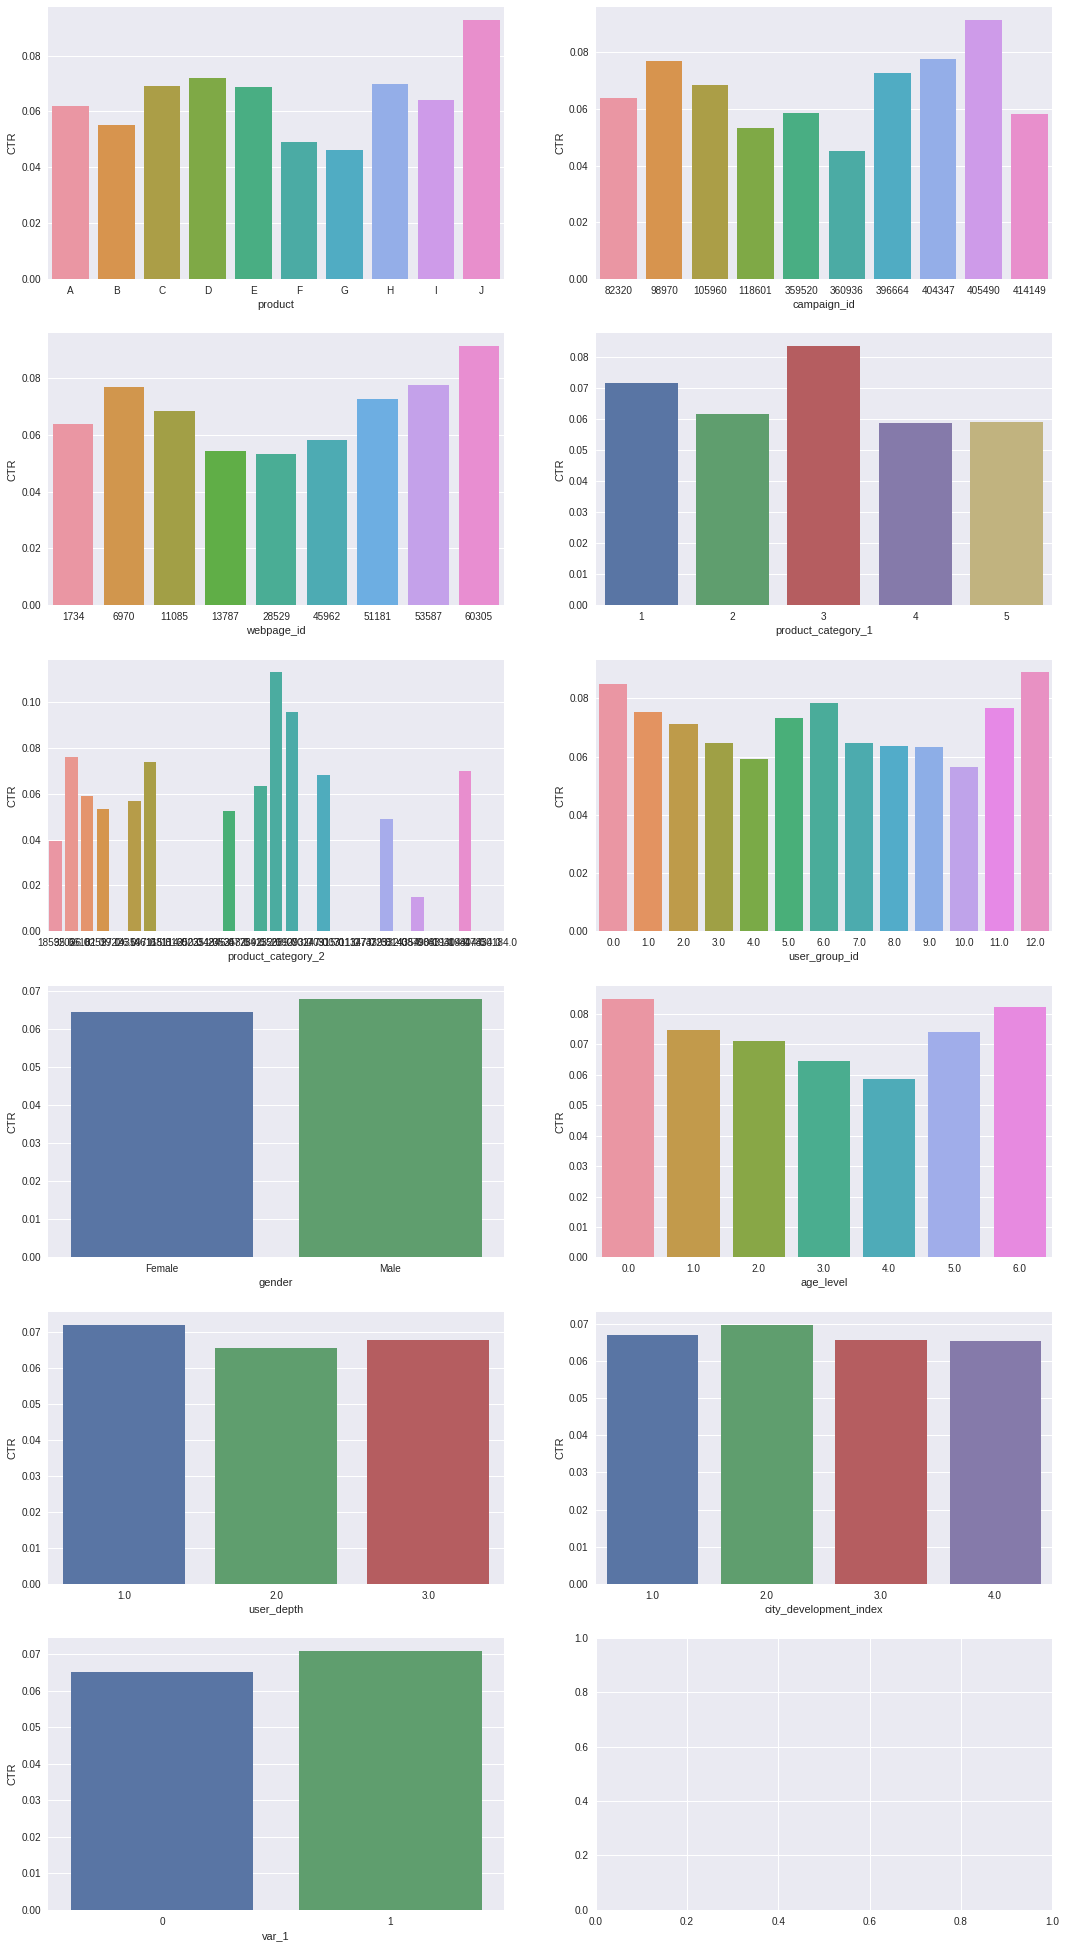

In [0]:
fig, ax = plt.subplots(figsize=(18,35), ncols=2, nrows=math.ceil(len(cat_cols)/2))
r = 0
c = 0
for col in cat_cols:
  temp = train_df.groupby([col])['is_click'].mean()
  sns.barplot(x = temp.index, y = temp.values, ax = ax[r][c])
  ax[r][c].set(xlabel=col, ylabel='CTR')
  if c % 2 == 0:
    c += 1
  else:
    r += 1
    c = c - 1
plt.show()

## Past data

28th May 2017– 1st July 2017.

Here in past dataset action (view/ interest) means user has already clicked or directly came to this product page. so that means user has already seen this product. Now if he is interested in this product then he can mark it as interested.

That means  this past data shows traffic for every product page, and there is also very high chance that user has came to this page by clicking the advertisement.

We can create features related to product and users interaction with that product.



In [0]:
past_df.head(10)

,DateTime,user_id,product,action
0,2017-05-28 15:44,704,B,view
1,2017-05-29 07:08,499679,F,view
2,2017-05-29 07:10,499679,G,view
3,2017-05-29 07:10,499679,G,view
4,2017-05-29 07:10,499679,G,view
5,2017-05-29 07:10,499679,G,view
6,2017-05-29 07:10,499679,G,view
7,2017-05-29 07:10,499679,G,view
8,2017-05-29 07:10,499679,G,view
9,2017-05-29 07:11,499679,G,view


In [0]:
print("shape of past dataset : ", past_df.shape)

shape of past dataset :  (24287534, 4)


In [0]:
# number of null values in past data
past_df.isnull().sum()

DateTime    0
user_id     0
product     0
action      0
dtype: int64

### action

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


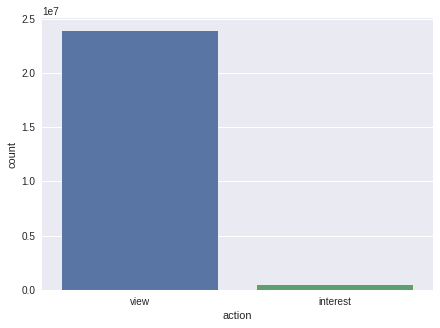

In [0]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(past_df['action'], ax=ax)
plt.show()

### product

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


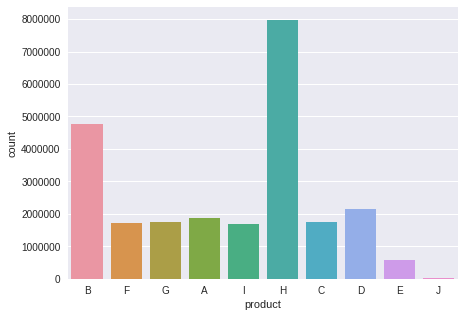

In [0]:
fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(past_df['product'], ax=ax)
plt.show()

### user_id

In [0]:
past_df['user_id'].nunique()

171309

171309 unique user ids 

In [0]:
len(set(train_df['user_id'].unique()) - set(past_df['user_id'].unique()))

4837

4837 user ids are not present in past data but present in train data.

Which means these users has never clicked on advertisement or came from direct weblink to this website between 28th May 2017– 1st July 2017 but they have came across (seen) advertisement between 2nd July 2017 – 7th July 2017.

In [0]:
len(set(test_df['user_id'].unique()) - set(past_df['user_id'].unique()))

2702

2782 user ids are not present in past data but present in test dataset

### Datetime

In [0]:
past_df.dtypes

DateTime    object
user_id      int64
product     object
action      object
dtype: object

In [0]:
past_df['DateTime'] = pd.to_datetime(past_df['DateTime'])

In [18]:
past_df.dtypes

DateTime    datetime64[ns]
user_id              int64
product             object
action              object
dtype: object

In [0]:
past_df['month_p'] = past_df['DateTime'].dt.month
past_df['day_p'] = past_df['DateTime'].dt.day
past_df['hour_p'] = past_df['DateTime'].dt.hour

In [0]:
past_df['hour_seg_pro_p'] = np.nan
past_df.loc[(past_df['hour_p'] >=0) & (past_df['hour_p'] <6), 'hour_seg_pro_p'] = 0
past_df.loc[(past_df['hour_p'] >=6) & (past_df['hour_p'] <12), 'hour_seg_pro_p'] = 1
past_df.loc[(past_df['hour_p'] >=12) & (past_df['hour_p'] <18), 'hour_seg_pro_p'] = 2
past_df.loc[(past_df['hour_p'] >=18), 'hour_seg_pro_p'] = 3

In [0]:
past_df.loc[(past_df['action'] == 'view'), 'action'] = 0
past_df.loc[(past_df['action'] == 'interest'), 'action'] = 1
past_df['action'] = past_df['action'].astype('int')

In [0]:
past_df['hour_seg_pro_p'] = past_df['hour_seg_pro_p'].astype('int')

In [23]:
past_df.head()

,DateTime,user_id,product,action,month_p,day_p,hour_p,hour_seg_pro_p
0,2017-05-28 15:44:00,704,B,0,5,28,15,2
1,2017-05-29 07:08:00,499679,F,0,5,29,7,1
2,2017-05-29 07:10:00,499679,G,0,5,29,7,1
3,2017-05-29 07:10:00,499679,G,0,5,29,7,1
4,2017-05-29 07:10:00,499679,G,0,5,29,7,1


In [0]:
# for every product - month - day - hour_seg_pro_p
# total records
# total views
# total interests
# number of unique customers
# also keep dow_p and wom_p

In [0]:
product_p = past_df.groupby(['product', 'month_p', 'day_p', 'hour_seg_pro_p']).agg({'user_id': 'nunique', 'DateTime': 'count', 'action': 'sum'}).rename(columns={'user_id': 'nunique_users', 'DateTime': 'counts', 'action': 'interest'})

In [0]:
p_p_ctr = ((product_p['nunique_users'] + product_p['interest']) / product_p['counts']).reset_index().rename(columns={0: 'ctr'})

In [0]:
p_p_ctr['hour_seg_pro_p'] = p_p_ctr['hour_seg_pro_p'].astype('int')

In [0]:
p_p_ctr['col_name'] = p_p_ctr['month_p'].astype('str') + '_' + p_p_ctr['day_p'].astype('str') + '_' + p_p_ctr['hour_seg_pro_p'].astype('str')

In [29]:
p_p_ctr.head()

,product,month_p,day_p,hour_seg_pro_p,ctr,col_name
0,A,5,29,1,0.100000,5_29_1
1,A,5,30,3,0.166667,5_30_3
2,A,6,10,2,0.200000,6_10_2
3,A,6,10,3,1.000000,6_10_3
4,A,6,11,2,1.000000,6_11_2


In [0]:
p_p_cols = ['product']

for i in range(28, 32):
  for j in range(4):
    p_p_cols.append('5_' + str(i) + '_'+ str(j))
    
for i in range(1, 31):
  for j in range(4):
    p_p_cols.append('6_' + str(i) + '_'+ str(j))

for j in range(4):
  p_p_cols.append('7_' + str(1) + '_'+ str(j))


In [31]:
len(p_p_cols)

141

In [0]:
ctr_final = pd.DataFrame(columns=p_p_cols)

In [0]:
ctr_final['product'] = p_p_ctr['product'].unique()

In [0]:
for i,x in p_p_ctr.iterrows():
  ctr_final.loc[ctr_final['product'] == x['product'], x['col_name']] = x['ctr']

In [35]:
ctr_final

,product,5_28_0,5_28_1,5_28_2,5_28_3,5_29_0,5_29_1,5_29_2,5_29_3,5_30_0,...,6_29_2,6_29_3,6_30_0,6_30_1,6_30_2,6_30_3,7_1_0,7_1_1,7_1_2,7_1_3
0,A,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN,...,0.243241,0.240424,0.297643,0.247334,0.246071,0.239235,0.301665,0.244272,0.230921,0.243029
1,B,NaN,NaN,1,NaN,NaN,0.2,NaN,NaN,NaN,...,0.166177,0.162707,0.219594,0.172475,0.17182,0.165839,0.218042,0.175369,0.17058,0.16134
2,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.256607,0.246106,0.291403,0.258369,0.257995,0.256503,0.291608,0.260151,0.248755,0.241015
3,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.220399,0.222341,0.269491,0.225642,0.224263,0.229427,0.281193,0.224109,0.225654,0.220433
4,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.303076,0.300367,0.322363,0.304663,0.316137,0.306205,0.327837,0.308635,0.295565,0.299863
5,F,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,0.195,0.213715,0.247839,0.211764,0.205402,0.208888,0.242637,0.209247,0.212377,0.213212
6,G,NaN,NaN,NaN,NaN,NaN,0.0833333,NaN,NaN,NaN,...,0.221778,0.22042,0.288876,0.224499,0.233513,0.229307,0.289028,0.226219,0.23352,0.224155
7,H,NaN,NaN,NaN,NaN,NaN,0.037037,NaN,NaN,NaN,...,0.133426,0.128599,0.171766,0.142135,0.140335,0.1279,0.173256,0.142546,0.137383,0.126428
8,I,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,...,0.252168,0.255084,0.307341,0.260693,0.261181,0.262984,0.297163,0.266888,0.260317,0.25155
9,J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.389286,0.31129,0.30303,0.333333,0.377737,0.351613,0.317365,0.375224,0.402923,0.427105


In [36]:
ctr_final.isnull().sum(axis=1)

0    66
1    56
2    64
3    69
4    78
5    64
6    68
7    60
8    61
9    82
dtype: int64

In [0]:
ctr_final.fillna(0, inplace=True)

In [0]:
ctr_final.set_index('product', inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


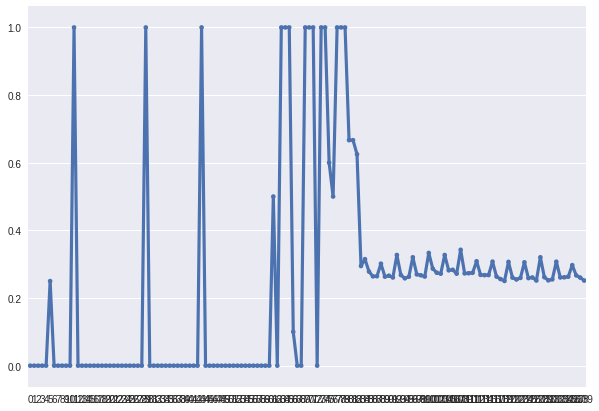

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.pointplot(y=ctr_final.loc['I'].values, x= np.arange(len(ctr_final.loc['I'].values)), ax=ax)
plt.setp(ax.collections, sizes=[5])
plt.show()

In [0]:
p_p_ts_cols = []

for i in range(28, 32):
  for j in ['03:00:00', '09:00:00', '15:00:00', '21:00:00']:
    p_p_ts_cols.append('2017-05-' + str(i) + ' '+ j)
    
for i in range(1, 31):
  for j in ['03:00:00', '09:00:00', '15:00:00', '21:00:00']:
    p_p_ts_cols.append('2017-06-' + str(i) + ' '+ j)

for j in ['03:00:00', '09:00:00', '15:00:00', '21:00:00']:
  p_p_ts_cols.append('2017-07-01' + ' '+ j)


In [0]:
p_f_ts_cols = []

for i in range(2, 10):
  for j in ['03:00:00', '09:00:00', '15:00:00', '21:00:00']:
    p_f_ts_cols.append('2017-07-' + str(i) + ' '+ j)


In [41]:
pd.to_datetime(p_p_ts_cols)

DatetimeIndex(['2017-05-28 03:00:00', '2017-05-28 09:00:00',
               '2017-05-28 15:00:00', '2017-05-28 21:00:00',
               '2017-05-29 03:00:00', '2017-05-29 09:00:00',
               '2017-05-29 15:00:00', '2017-05-29 21:00:00',
               '2017-05-30 03:00:00', '2017-05-30 09:00:00',
               ...
               '2017-06-29 15:00:00', '2017-06-29 21:00:00',
               '2017-06-30 03:00:00', '2017-06-30 09:00:00',
               '2017-06-30 15:00:00', '2017-06-30 21:00:00',
               '2017-07-01 03:00:00', '2017-07-01 09:00:00',
               '2017-07-01 15:00:00', '2017-07-01 21:00:00'],
              dtype='datetime64[ns]', length=140, freq=None)

In [0]:
# seasonal_periods for holt's winter forcasting method
# A - 4
# B - 4
# C - 4
# D - 3
# E - 4
# F - 3
# G - 3
# H - 3
# I - 3
# J - 4

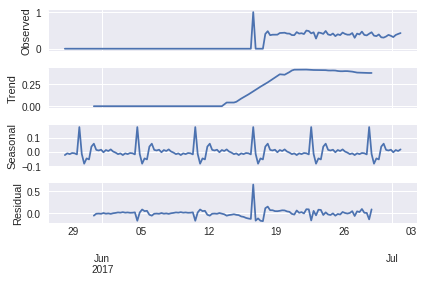

In [246]:
temp_df = pd.DataFrame({'ctr': ctr_final.loc['J'].values}, index=pd.to_datetime(p_p_ts_cols))
sm.tsa.seasonal_decompose(temp_df).plot()
plt.show()

In [247]:
temp_df.head()

,ctr
2017-05-28 03:00:00,0.0
2017-05-28 09:00:00,0.0
2017-05-28 15:00:00,0.0
2017-05-28 21:00:00,0.0
2017-05-29 03:00:00,0.0


In [0]:
fut_df = pd.DataFrame(index=pd.to_datetime(p_f_ts_cols))
fitf1 = ExponentialSmoothing(np.asarray(temp_df['ctr']) ,seasonal_periods=4, trend='add', seasonal='add', damped=True).fit()
fut_df['Holt_Winter1'] = fitf1.forecast(fut_df.shape[0])

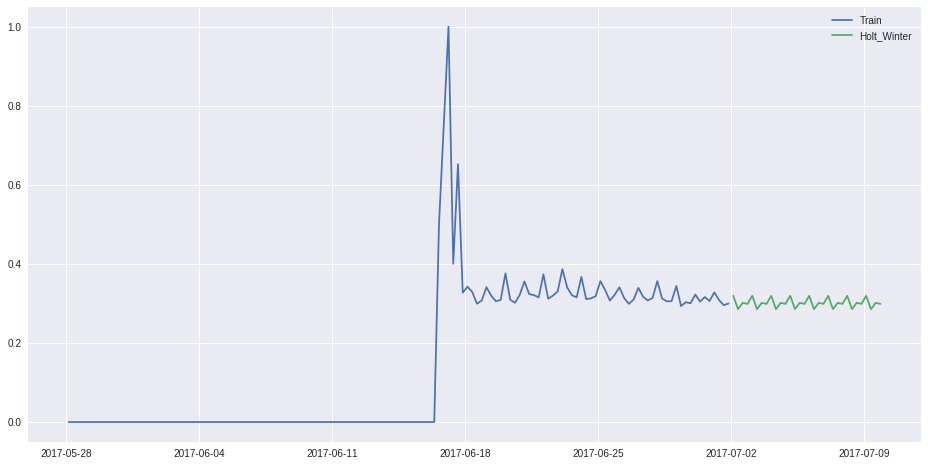

In [220]:
plt.figure(figsize=(16,8))
plt.plot(temp_df['ctr'], label='Train')
plt.plot(fut_df['Holt_Winter1'], label='Holt_Winter')
plt.legend(loc='best')

plt.show()

In [0]:
temp_df_tr = temp_df.iloc[0:-16]
temp_df_te = temp_df.iloc[-16:]
temp_df_te = temp_df_te.copy()

fit1 = ExponentialSmoothing(np.asarray(temp_df_tr['ctr']) ,seasonal_periods=3, trend='add', seasonal='add', damped = True).fit()
#fit1 = ExponentialSmoothing(np.asarray(temp_df_tr['ctr']) ,seasonal_periods=3, trend='add', seasonal='add').fit()
#fit1 = ExponentialSmoothing(np.asarray(temp_df_tr['ctr']) ,seasonal_periods=3, seasonal='add').fit()

temp_df_te['Holt_Winter'] = fit1.forecast(temp_df_te.shape[0])

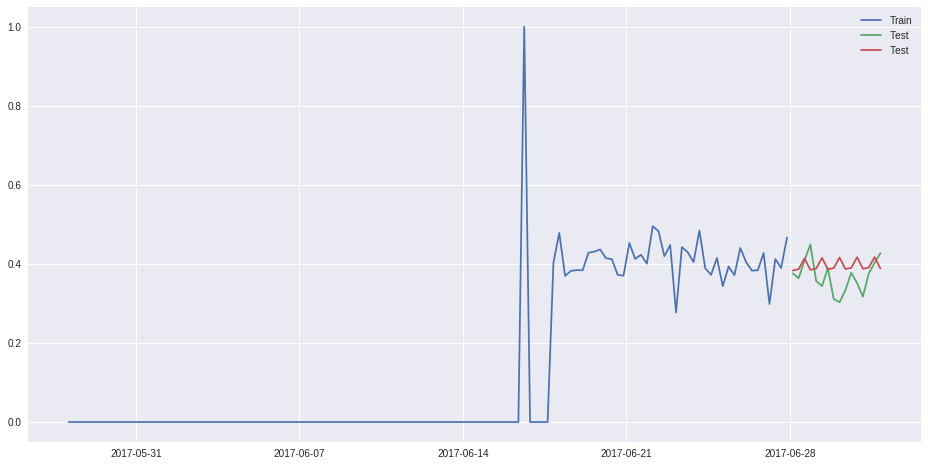

In [252]:
plt.figure(figsize=(16,8))
plt.plot(temp_df_tr['ctr'], label='Train')
plt.plot(temp_df_te['ctr'], label='Test')
plt.plot(temp_df_te['Holt_Winter'], label='Test')
plt.legend(loc='best')

plt.show()

In [254]:
math.sqrt(mean_squared_error(temp_df_te['ctr'], temp_df_te['Holt_Winter']))

0.052421236971989034

In [0]:
ctr_f_final = pd.DataFrame(index=pd.to_datetime(p_f_ts_cols))

In [259]:
# seasonal_periods
for i, sp in zip(ctr_final.index, [4, 4, 4, 3, 4, 3, 3, 3, 3, 4]):
  print(i, sp)

A 4
B 4
C 4
D 3
E 4
F 3
G 3
H 3
I 3
J 4


In [0]:
for i, sp in zip(ctr_final.index, [4, 4, 4, 3, 4, 3, 3, 3, 3, 4]):
  temp_df = pd.DataFrame({'ctr': ctr_final.loc[i].values}, index=pd.to_datetime(p_p_ts_cols))
  fit = ExponentialSmoothing(np.asarray(temp_df['ctr']) ,seasonal_periods=sp, trend='add', seasonal='add', damped = True).fit()
  ctr_f_final[i] = fit.forecast(ctr_f_final.shape[0]) 

In [262]:
ctr_f_final

,A,B,C,D,E,F,G,H,I,J
2017-07-02 03:00:00,0.295180,0.216171,0.279412,0.248623,0.319284,0.181237,0.277838,0.134175,0.288417,0.366479
2017-07-02 09:00:00,0.245647,0.173749,0.260180,0.234573,0.285554,0.230770,0.226898,0.111572,0.232193,0.367670
2017-07-02 15:00:00,0.240488,0.169234,0.239485,0.224037,0.301503,0.235498,0.219632,0.163609,0.276886,0.368736
2017-07-02 21:00:00,0.239478,0.165763,0.264696,0.248623,0.298866,0.181150,0.277883,0.133523,0.288417,0.369689
2017-07-03 03:00:00,0.295157,0.216171,0.279204,0.234573,0.319227,0.230728,0.226922,0.111302,0.232193,0.370542
2017-07-03 09:00:00,0.245627,0.173750,0.260018,0.224037,0.285543,0.235478,0.219645,0.163498,0.276886,0.371306
2017-07-03 15:00:00,0.240471,0.169234,0.239360,0.248623,0.301501,0.181140,0.277890,0.133477,0.288417,0.371989
2017-07-03 21:00:00,0.239464,0.165763,0.264600,0.234573,0.298865,0.230723,0.226926,0.111283,0.232193,0.372600
2017-07-04 03:00:00,0.295145,0.216172,0.279129,0.224037,0.319227,0.235475,0.219647,0.163490,0.276886,0.373146
2017-07-04 09:00:00,0.245617,0.173750,0.259960,0.248623,0.285543,0.181139,0.277891,0.133474,0.288417,0.373636


In [274]:
past_df.head()

,DateTime,user_id,product,action,month_p,day_p,hour_p,hour_seg_pro_p
0,2017-05-28 15:44:00,704,B,0,5,28,15,2
1,2017-05-29 07:08:00,499679,F,0,5,29,7,1
2,2017-05-29 07:10:00,499679,G,0,5,29,7,1
3,2017-05-29 07:10:00,499679,G,0,5,29,7,1
4,2017-05-29 07:10:00,499679,G,0,5,29,7,1


In [0]:
user_gb = past_df.groupby(['user_id', 'product']).agg({'month_p': 'count', 'action': 'sum'}).rename(columns={'month_p': 'counts', 'action': 'interest'})

In [0]:
user_ioc_df = ((user_gb['interest'] + 1) / user_gb['counts']).reset_index().rename(columns={0: 'ioc'})

In [0]:
user_ioc_final = ((user_gb['interest'] + 1) / user_gb['counts']).unstack()

In [0]:
user_ioc_final.fillna(0, inplace=True)

In [0]:
user_ioc_final = user_ioc_final.reset_index()

In [386]:
user_ioc_final.head()

product,user_id,A,B,C,D,E,F,G,H,I,J
0,4,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.0
1,19,0.071429,0.047619,1.000000,0.037736,0.125000,0.083333,0.157895,0.062500,0.000000,0.0
2,25,0.125000,0.000000,0.000000,0.000000,1.000000,0.500000,0.023810,0.100000,0.250000,0.0
3,26,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.0
4,30,0.500000,0.125000,0.071429,0.500000,0.166667,0.000000,1.000000,0.062500,0.285714,0.0


In [354]:
gc.collect()

6515

In [0]:
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])

In [0]:
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])

In [0]:
train_df['day'] = train_df['DateTime'].dt.day
train_df['hour'] = train_df['DateTime'].dt.hour
train_df['dow'] = train_df['DateTime'].dt.dayofweek

In [0]:
train_df['hour_seg'] = np.nan
train_df.loc[(train_df['hour'] >=0) & (train_df['hour'] <6), 'hour_seg'] = 0
train_df.loc[(train_df['hour'] >=6) & (train_df['hour'] <12), 'hour_seg'] = 1
train_df.loc[(train_df['hour'] >=12) & (train_df['hour'] <18), 'hour_seg'] = 2
train_df.loc[(train_df['hour'] >=18), 'hour_seg'] = 3
train_df['hour_seg'] = train_df['hour_seg'].astype('int')

In [0]:
test_df['day'] = test_df['DateTime'].dt.day
test_df['hour'] = test_df['DateTime'].dt.hour
test_df['dow'] = test_df['DateTime'].dt.dayofweek

In [0]:
test_df['hour_seg'] = np.nan
test_df.loc[(test_df['hour'] >=0) & (test_df['hour'] <6), 'hour_seg'] = 0
test_df.loc[(test_df['hour'] >=6) & (test_df['hour'] <12), 'hour_seg'] = 1
test_df.loc[(test_df['hour'] >=12) & (test_df['hour'] <18), 'hour_seg'] = 2
test_df.loc[(test_df['hour'] >=18), 'hour_seg'] = 3
test_df['hour_seg'] = test_df['hour_seg'].astype('int')

In [355]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click,day,hour,dow,hour_seg
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0,2,0,6,0
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0,2,0,6,0
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0,2,0,6,0
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0,2,0,6,0
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0,2,0,6,0


In [357]:
test_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,day,hour,dow,hour_seg
0,411705,2017-07-08,732573,J,404347,53587,1,NaN,5.0,Male,5.0,3.0,NaN,0,8,0,5,0
1,208263,2017-07-08,172910,I,118601,28529,3,82527.0,NaN,NaN,NaN,NaN,NaN,1,8,0,5,0
2,239450,2017-07-08,172910,I,118601,28529,4,82527.0,NaN,NaN,NaN,NaN,NaN,1,8,0,5,0
3,547761,2017-07-08,557318,G,118601,28529,5,82527.0,1.0,Male,1.0,3.0,1.0,0,8,0,5,0
4,574275,2017-07-08,923896,H,118601,28529,5,82527.0,9.0,Female,3.0,1.0,NaN,1,8,0,5,0


In [0]:
product_names = [i for i in user_ioc_final.columns if i not in ['user_id']]

In [0]:
test_df = pd.merge(test_df, user_ioc_final, on='user_id', how='left')
train_df = pd.merge(train_df, user_ioc_final, on='user_id', how='left')

In [0]:
train_df[product_names] = train_df[product_names].fillna(0)
test_df[product_names] = test_df[product_names].fillna(0)

In [385]:
train_df.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,...,A,B,C,D,E,F,G,H,I,J
0,140690,2017-07-02 00:00:00,858557,C,359520,13787,4,NaN,10.0,Female,...,0.000,0.012500,0.200000,0.04,0.002294,0.025000,0.1,0.040000,0.166667,0.0
1,333291,2017-07-02 00:00:00,243253,C,105960,11085,5,NaN,8.0,Female,...,0.000,0.083333,0.090909,0.00,0.000000,0.333333,1.0,0.028571,0.000000,0.0
2,129781,2017-07-02 00:00:00,243253,C,359520,13787,4,NaN,8.0,Female,...,0.000,0.083333,0.090909,0.00,0.000000,0.333333,1.0,0.028571,0.000000,0.0
3,464848,2017-07-02 00:00:00,1097446,I,359520,13787,3,NaN,3.0,Male,...,0.000,0.125000,0.200000,1.00,0.000000,0.000000,0.2,0.133333,0.222222,0.0
4,90569,2017-07-02 00:01:00,663656,C,405490,60305,3,NaN,2.0,Male,...,0.125,0.153846,0.333333,0.00,0.000000,0.333333,0.0,0.066667,0.500000,0.0


In [0]:
train_df['ctr_p'] = np.nan
test_df['ctr_p'] = np.nan

In [0]:
train_df['ctr_hour'] = np.nan
train_df.loc[(train_df['hour_seg'] == 0), 'ctr_hour'] = 3
train_df.loc[(train_df['hour_seg'] == 1), 'ctr_hour'] = 9
train_df.loc[(train_df['hour_seg'] == 2), 'ctr_hour'] = 15
train_df.loc[(train_df['hour_seg'] == 3), 'ctr_hour'] = 21
train_df['ctr_hour'] = train_df['ctr_hour'].astype('int')

test_df['ctr_hour'] = np.nan
test_df.loc[(test_df['hour_seg'] == 0), 'ctr_hour'] = 3
test_df.loc[(test_df['hour_seg'] == 1), 'ctr_hour'] = 9
test_df.loc[(test_df['hour_seg'] == 2), 'ctr_hour'] = 15
test_df.loc[(test_df['hour_seg'] == 3), 'ctr_hour'] = 21
test_df['ctr_hour'] = test_df['ctr_hour'].astype('int')

In [0]:
for i, x in ctr_f_final.iterrows():
  d = i.day
  h = i.hour
  for product in product_names:
    train_df.loc[((train_df['product'] == product) & (train_df['day'] == d) & (train_df['ctr_hour'] == h)), 'ctr_p'] = x[product]
    test_df.loc[((test_df['product'] == product) & (test_df['day'] == d) & (test_df['ctr_hour'] == h)), 'ctr_p'] = x[product]

In [0]:
train_df.drop('ctr_hour', axis=1, inplace=True)
test_df.drop('ctr_hour', axis=1, inplace=True)

In [404]:
train_df.shape

(463291, 30)

In [405]:
test_df.shape

(128858, 29)

In [406]:
train_df.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
day                            0
hour                           0
dow                            0
hour_seg                       0
A                              0
B                              0
C                              0
D                              0
E                              0
F                              0
G                              0
H                              0
I                              0
J                              0
ctr_p                          0
dtype: int

In [408]:
test_df.isnull().sum()

session_id                    0
DateTime                      0
user_id                       0
product                       0
campaign_id                   0
webpage_id                    0
product_category_1            0
product_category_2        76171
user_group_id              5684
gender                     5684
age_level                  5684
user_depth                 5684
city_development_index    34609
var_1                         0
day                           0
hour                          0
dow                           0
hour_seg                      0
A                             0
B                             0
C                             0
D                             0
E                             0
F                             0
G                             0
H                             0
I                             0
J                             0
ctr_p                         0
dtype: int64

In [0]:
train_df['gender'] = train_df['gender'].fillna('unk')
test_df['gender'] = test_df['gender'].fillna('unk')

train_df[['product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index']] = train_df[['product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index']].fillna(-99)
test_df[['product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index']] = test_df[['product_category_2', 'user_group_id', 'age_level', 'user_depth', 'city_development_index']].fillna(-99)

In [0]:
train_df.to_csv('../input/train_p_u.csv', index=False)
test_df.to_csv('../input/test_p_u.csv', index=False)

In [413]:
print('# File sizes')
for f in os.listdir('../input'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('../input/' + f) / 1000000, 2)) + 'MB')

# File sizes
train.csv                     34.33MB
test.csv                      9.47MB
sample_submission.csv         1.14MB
train_p_u.csv                 97.41MB
historical_user_logs.csv      754.99MB
test_p_u.csv                  26.47MB


In [0]:
!cp ../input/train_p_u.csv ../../drive/ColabNotebooks/AV/american_express_amexpert_2018/input/

In [0]:
!cp ../input/test_p_u.csv ../../drive/ColabNotebooks/AV/american_express_amexpert_2018/input/

In [0]:
del past_df

In [427]:
gc.collect()

281

## Catboost

In [0]:
import catboost as cb

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix

In [0]:
features = [i for i in test_df.columns if i not in ['session_id', 'DateTime', 'user_id', 'dow', 'product_category_2']]

In [419]:
features

['product',
 'campaign_id',
 'webpage_id',
 'product_category_1',
 'user_group_id',
 'gender',
 'age_level',
 'user_depth',
 'city_development_index',
 'var_1',
 'day',
 'hour',
 'hour_seg',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'ctr_p']

In [0]:
cat_ind = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12]

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_df[features], train_df['is_click'], test_size=0.2, random_state=2018, stratify=train_df['is_click'])

In [0]:
clf = cb.CatBoostClassifier(iterations= 2000, loss_function='Logloss', eval_metric='AUC', learning_rate=0.02, random_seed=2018, l2_leaf_reg=3, max_depth=6, scale_pos_weight=10, od_type='Iter', od_wait=100)

In [435]:
clf.fit(X_train, y_train, cat_features=cat_ind, use_best_model=True, eval_set=(X_val, y_val))

0:	test: 0.5783405	best: 0.5783405 (0)	total: 1.59s	remaining: 53m 8s
1:	test: 0.5778797	best: 0.5783405 (0)	total: 2.73s	remaining: 45m 32s
2:	test: 0.5786824	best: 0.5786824 (2)	total: 4.15s	remaining: 46m 1s
3:	test: 0.5783993	best: 0.5786824 (2)	total: 5.55s	remaining: 46m 7s
4:	test: 0.5793219	best: 0.5793219 (4)	total: 7.02s	remaining: 46m 41s
5:	test: 0.5796379	best: 0.5796379 (5)	total: 8.19s	remaining: 45m 21s
6:	test: 0.5791450	best: 0.5796379 (5)	total: 9.26s	remaining: 43m 55s
7:	test: 0.5792499	best: 0.5796379 (5)	total: 10.6s	remaining: 44m 5s
8:	test: 0.5792499	best: 0.5796379 (5)	total: 12s	remaining: 44m 13s
9:	test: 0.5790866	best: 0.5796379 (5)	total: 13.1s	remaining: 43m 35s
10:	test: 0.5791085	best: 0.5796379 (5)	total: 14.2s	remaining: 42m 48s
11:	test: 0.5793887	best: 0.5796379 (5)	total: 15.4s	remaining: 42m 32s
12:	test: 0.5795484	best: 0.5796379 (5)	total: 16.4s	remaining: 41m 53s
13:	test: 0.5795466	best: 0.5796379 (5)	total: 17.8s	remaining: 42m 4s
14:	test:

In [0]:
pred_v = clf.predict(X_val)

In [437]:
pd.Series(pred_v).value_counts(normalize=True)

0.0    0.885386
1.0    0.114614
dtype: float64

In [438]:
y_train.value_counts(normalize=True)

0    0.932372
1    0.067628
Name: is_click, dtype: float64

In [439]:
y_val.value_counts(normalize=True)

0    0.932376
1    0.067624
Name: is_click, dtype: float64

In [0]:
pred_te = clf.predict_proba(test_df[features])

In [0]:
sub = pd.read_csv('../input/sample_submission.csv')
sub['is_click'] = pred_te
sub.to_csv('../submissions/cat1.csv', index=False)

In [0]:
!cp ../submissions/cat1.csv ../../drive/ColabNotebooks/AV/american_express_amexpert_2018/submissions/

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


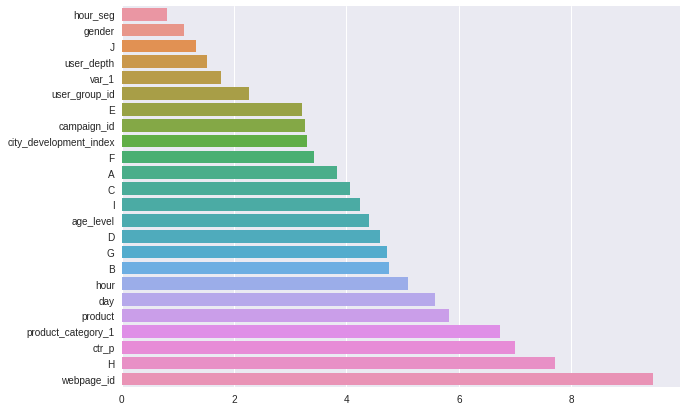

In [452]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=clf.feature_importances_[np.argsort(clf.feature_importances_)], y=np.array(features)[np.argsort(clf.feature_importances_)], ax=ax)
plt.show()

In [0]:
features1 = [i for i in test_df.columns if i not in ['session_id', 'DateTime', 'dow', 'product_category_2', 'hour_seg', 'gender']]

In [456]:
features1

['user_id',
 'product',
 'campaign_id',
 'webpage_id',
 'product_category_1',
 'user_group_id',
 'age_level',
 'user_depth',
 'city_development_index',
 'var_1',
 'day',
 'hour',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'ctr_p']

In [0]:
cat_ind1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
clf1 = cb.CatBoostClassifier(iterations= 2000, loss_function='Logloss', eval_metric='AUC', learning_rate=0.03, random_seed=2018, l2_leaf_reg=3, max_depth=8, scale_pos_weight=6, od_type='Iter', od_wait=100)

In [461]:
clf1.fit(train_df[features1], train_df['is_click'], cat_features=cat_ind1, use_best_model=True)

You should provide test set for use best model. use_best_model parameter swiched to false value.


0:	total: 2.2s	remaining: 1h 13m 16s
1:	total: 4.17s	remaining: 1h 9m 31s
2:	total: 6.21s	remaining: 1h 8m 51s
3:	total: 8.17s	remaining: 1h 7m 58s
4:	total: 10.2s	remaining: 1h 7m 43s
5:	total: 12.1s	remaining: 1h 7m 15s
6:	total: 13.9s	remaining: 1h 5m 44s
7:	total: 15.7s	remaining: 1h 5m 3s
8:	total: 17.7s	remaining: 1h 5m 9s
9:	total: 19.4s	remaining: 1h 4m 18s
10:	total: 21.4s	remaining: 1h 4m 23s
11:	total: 23.2s	remaining: 1h 4m 10s
12:	total: 25.3s	remaining: 1h 4m 21s
13:	total: 27.3s	remaining: 1h 4m 29s
14:	total: 29.2s	remaining: 1h 4m 18s
15:	total: 31s	remaining: 1h 4m 6s
16:	total: 32.9s	remaining: 1h 3m 57s
17:	total: 34.8s	remaining: 1h 3m 56s
18:	total: 36.8s	remaining: 1h 3m 51s
19:	total: 38.7s	remaining: 1h 3m 55s
20:	total: 40.6s	remaining: 1h 3m 44s
21:	total: 42.7s	remaining: 1h 4m
22:	total: 44.7s	remaining: 1h 4m
23:	total: 46.7s	remaining: 1h 4m 4s
24:	total: 48.4s	remaining: 1h 3m 46s
25:	total: 50.5s	remaining: 1h 3m 52s
26:	total: 52.3s	remaining: 1h 3m 44

In [0]:
pred_te1 = clf1.predict_proba(test_df[features1])
sub = pd.read_csv('../input/sample_submission.csv')
sub['is_click'] = pred_te1
sub.to_csv('../submissions/cat2.csv', index=False)

In [0]:
!cp ../submissions/cat2.csv ../../drive/ColabNotebooks/AV/american_express_amexpert_2018/submissions/

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


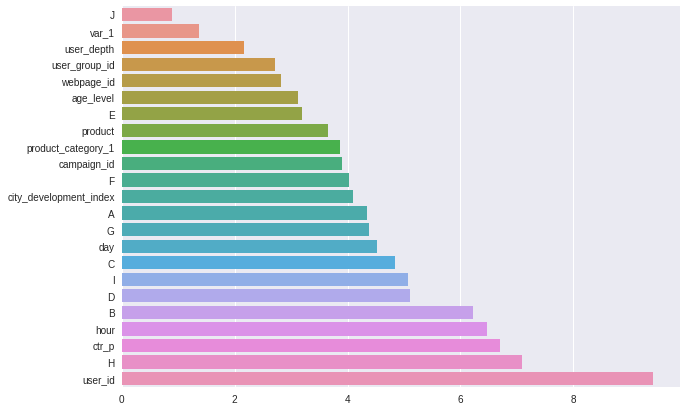

In [466]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=clf1.feature_importances_[np.argsort(clf1.feature_importances_)], y=np.array(features1)[np.argsort(clf1.feature_importances_)], ax=ax)
plt.show()